# Homework 5

This homework is going to be all about advanced plotting and curve fitting! All of these are extremely useful in any STEM based course, so the goal of this homework is to get y'all more comfortable with these methods.

### Problem 1: 3D Subplots (25 Points)

Plot the following graphs in one figure. We should see 4 total plots (2 x 2)

**Top Left**:

$$f(x,y) = \frac{sgn(xy) * sgn(1-(9x)^2+(9y)^2)}{9}$$

**Top Right**:

$$f(x,y) = (0.4^2-(0.6-(x^2+y^2)^{1/2})^2)^{1/2}$$

**Bottom Left**:

$$f(x,y) = \frac{1}{15(x^2+y^2)}$$

**Bottom Right**:

$$f(x,y) = \frac{(1-sgn(-x-.51+abs(2y)))(sgn(\frac{1}{2}-x)+1)}{3}$$


Use the same colormap for the whole figure (all 4 plots), add a colorbar for the whole figure, a title for each plot, and x and y labels for each plot. Pick the same domain for $x$ and $y$ and it should be the same for all plots. I will let you figure out what domain works best. Each of these is an interesting shape or structure. Create a markdown cell below your plotting cell describing what you see in each plot.

Hint: `numpy` has a sgn(x) function

/Users/jamessunseri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


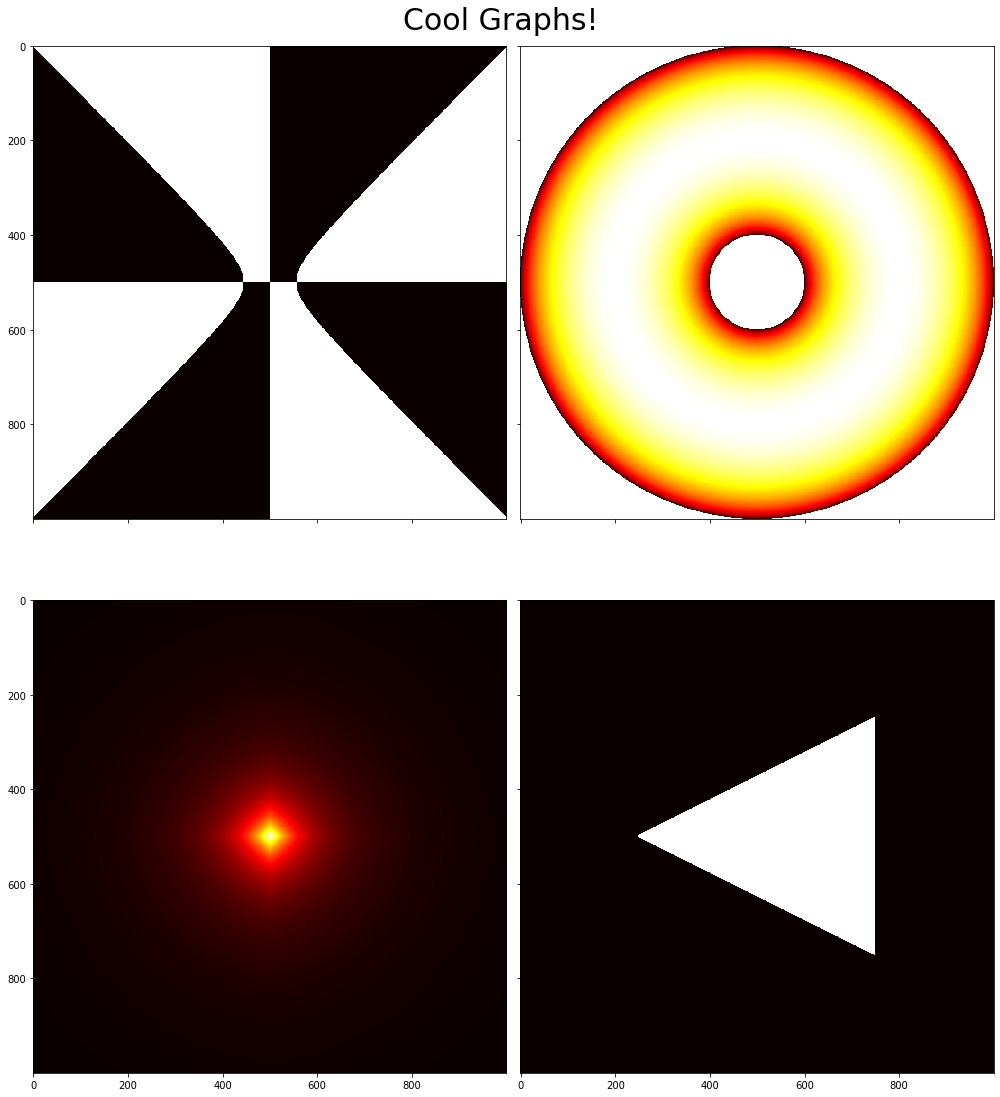

In [19]:
###Your Code Here###

x, y = np.meshgrid(np.linspace(-1, 1, 1000),
                   np.linspace(-1, 1, 1000)) #change the resolution to see how the picture changes!


#have to include values around x,y = (0,0) due to singularity
x_l, y_l = np.linspace(-1, -0.1, 500), np.linspace(-1, -0.1, 500)
x_r, y_r = np.linspace(0.1, 1, 500), np.linspace(0.1, 1, 500)
x_1,y_1 = np.append(x_l, x_r),np.append(y_l, y_r)
x_,y_ = np.meshgrid(x_1, y_1)

f_1 = (np.sign(x*y) * np.sign(1 - (9*x)**2 + (9*y)**2))/9

f_2 = np.sqrt(0.4**2 - (0.6 - np.sqrt(x**2 + y**2))**2)

f_3 = 1/ (15*(x_**2 + y_**2))

f_4 = ((1 - np.sign(-x - .51 + np.abs(2*y)))*(np.sign(0.5 - x) + 1))/3



#Generating the very large figure
#one figure with 2 columns, and 3 rows
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(14,16),sharex=True, sharey=True)
f.suptitle("Cool Graphs!", fontsize=30)
#top left
ax1.imshow(f_1)
# ax1.set_title("Title")
# ax1.set_xlabel("x-axis")
# ax1.set_ylabel("y-axis")
#top right
ax2.imshow(f_2)
# ax2.set_title("Title")
# ax2.set_xlabel("x-axis")
# ax2.set_ylabel("y-axis")
#bottom left
ax3.imshow(f_3)
# ax3.set_title("Title")
# ax3.set_xlabel("x-axis")
# ax3.set_ylabel("y-axis")
#bottom right
ax4.imshow(f_4)
# ax4.set_title("Title")
# ax4.set_xlabel("x-axis")
# ax4.set_ylabel("y-axis")

f.tight_layout()
plt.show()

## Plotting Data

### Problem 2: Covid-19 (25 Points)


Last week we learned how to import data into our notebooks in the form of arrays. Well we can actually plot that data! For this problem we will actually make a pretty relevant plot to the state of the world in 2020. As someone who has taken the Python DeCal you will be able to say that you have worked with real COVID-19 Data. So often we simply listen to people tell us about the data, but you should be able to look at it yourself (to reduce bias of course). 

In this problem we will plot some COVID-19 United States Data from the https://ourworldindata.org/coronavirus-source-data, You should have a file named `Covid_Data.csv` in the same directory as this notebook. The data starts on January 1st, 2020 and each new row below that is the next day until the end of the data set which goes to September 23rd, 2020. 


**Part a)** Your task for this problem is to make a scatter plot of the Total Cases (unsmoothed) in the United States for each day since the data started being taken. Make sure to import the data using the `numpy.loadtxt`function.

Hint 1: Set `Unpack = True` and import all the required data sets as their own 1D arrays

Hint 2: Skip the first row in the data set.

Hint 3: You dont need the first column because that is the  date which would be a string, while the rest of the data is floats. This may cause some issues. Think about how you can get around this. 

Extra: If you feel ambitious, try and figure out how you can make the x-axis in units of months instead of just number of days. You `plt.xticks()` could be useful for this because you can put strings for your x-axis tick marks. 


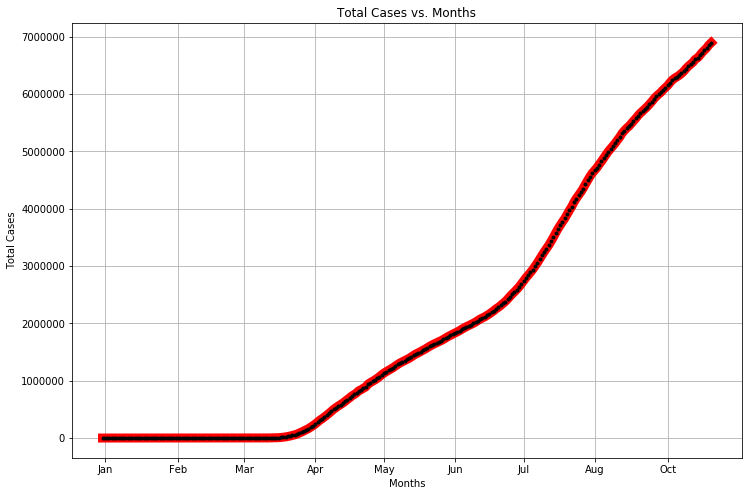

In [65]:
###Your Code Here###

data=np.loadtxt('Covid_Data.csv', delimiter=',', skiprows=1, 
                usecols= (1,2,3,4,5,6,7,8,9,10,11,12), unpack=True)

total_cases = data[0]
days = range(len(total_cases))

#custom x-axis each index corresponds to a new month
locations = [1, 33, 62,93,123,154,184,215,247]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Oct', 'Sep']


plt.figure(figsize=(12,8))
plt.title("Total Cases vs. Months")
plt.xlabel("Months")
plt.ylabel("Total Cases")
plt.plot(days, total_cases, 'r-', linewidth=9)
plt.plot(days, total_cases, 'k.')
plt.xticks(locations, months)
plt.grid()
plt.show()

**Part b)** Now make a similar plot of New Cases (unsmoothed) vs. time (days). Dont forget to include your plot's title, axis labels (with units), and a legend.

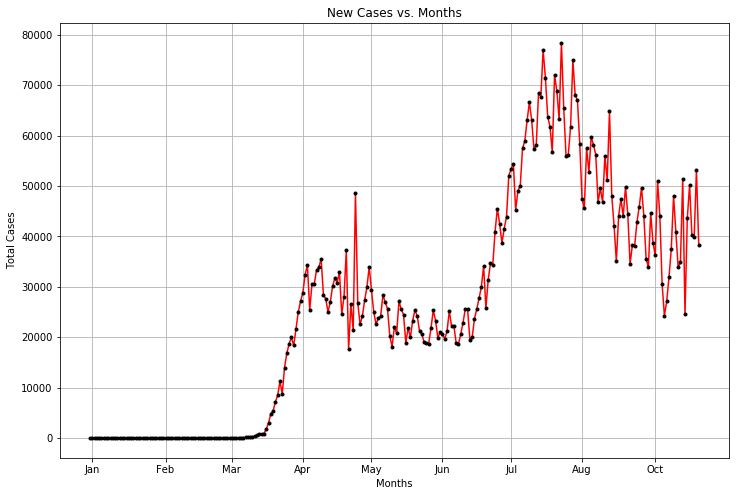

In [61]:
###Your Code Here###

new_cases = data[1]

plt.figure(figsize=(12,8))
plt.title("New Cases vs. Months")
plt.xlabel("Months")
plt.ylabel("Total Cases")
plt.plot(days, new_cases, 'r-')
plt.plot(days, new_cases, 'k.')
plt.xticks(locations, months)
plt.grid()
plt.show()

**Part c)** A crucial part of being a scientist is being able to look at a data set and find something interesting that they want to look at within a data set. Go ahead and open up the data set in some spreadsheet editor (I Use Microsoft Excel for example) and look at the titles for each column. Pick one of the columns that you find really interesting or that is relevant to show someone. Plot that vs time (days). As usual dont forget to add a title, labels, and a legend. 

In [68]:
###Your Code Here###

"""This is whatever the students want to put so no solutions required here,
but they should plot atleat something!"""

'This is whatever the students want to put so no solutions required here,\nbut they should plot atleat something!'

# Curve Fitting

#### The following problem will be us exploring how to fit a set of data.

#### This is inherently very statistics heavy to fully understand. So, do not freak out if the rest of this cell doesn't make any sense to you right now. It freaked me out when I first looked at it but now that I have actually learned stats in my other courses it isn't too scary to read. I am just going to put it here for your reference in the future if you want to understand what is happening more deeply. 


Note: The following information was provided and adapted from Physics 77


The simplest technique to describe is **least-squares fitting**. Usually you use the least-squares fit if **you have a set of data** (pairs of data points $(x_i, y_i)$ ), and **you want to describe it in terms of a model** $y(x;\{\theta_j\})$, where **you have parameters** $\{\theta_j\}$ **that are unknown**. The purpose of your fit is to determine the values of $\{\theta_j\}$ and (hopefully) their uncertainties. An example of a model is:

$$y = a_0 + a_1 x$$

where the unknown parameters $\theta_j$ are $a_0$ and $a_1$.

There are two standard cases where least-squares method is applicable:
1. You know errors for each data point $\sigma_i$ and you know that those errors are Gaussian. In this case, you minimize $\chi^2=\sum \left(\frac{y_i - y(x_i;\theta)}{\sigma_i}\right)^2$ with respect to the parameters $\{\theta_j\}$. The value of the $\chi^2_{\min}$ can be interpreted as a goodness-of-fit. The parameters $\{\theta_j\}$ that minimize $\chi^2$ have probabilistic interpretation
1. You know that the errors are Gaussian and are the same for each data point, but you do not know their magnitude. In this case, you would minimize the sum of squares: $\mathcal{S} = \sum \left(y_i - y(x_i;\theta)\right)^2$. Then value of $\mathcal{S}$ can be used to *estimate* the errors $\sigma_i$ for each data point: $\sigma_i = \sqrt{\mathcal{S}/(N_\mathrm{data}-N_\mathrm{parameters})}$
The errors on $\theta$ have a probabilistic definition, but you lose information about the goodness of fit
1. If the errors are not known to be Gaussian, then the least square method is not useful to estimate uncertainties or the goodness of fit. It is also not guaranteed to be unbiased or most efficient. 

### Let's try it out by fitting a straight line model to some data


First lets generate some fake data and plot it

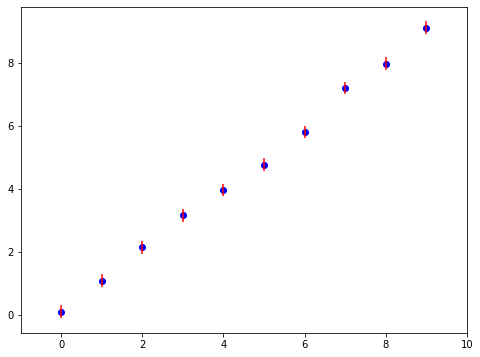

In [4]:
import scipy.optimize as fitter

# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
a0 = 0
b0 = 1
sig = 0.2
Npoints = 10
xdata = np.arange(0,Npoints,1.)
ydata = a0+xdata*b0+sig*np.random.standard_normal(size=Npoints)
sigma = np.ones(Npoints)*sig

plt.figure(figsize=(8,6))
plt.scatter(xdata,ydata,color='b')
plt.errorbar(xdata,ydata, sigma, color='r',ls='none')
plt.xlim(-1,Npoints)
plt.show()

Your model's parameters and their uncertainties are the following: 

a= 0.067+/-0.118 

b= 0.991+/-0.022 


Your model's chi^2 value and reduced chi^2 value and their uncertainties are the following: 

chi^2 =  4.69 

chi^2/d.f.= 0.59 



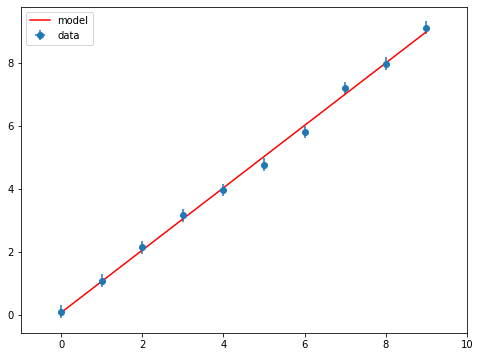

In [5]:
# Make sure you run the cell above this first to generate some artificial data
# to which we will fit this curve

#=============================================================================================
# Define a fit model. For this part, we will use a linear function
# The function which defines your model HAS TO TAKE ON A SPECIFIC FORM
#=============================================================================================

def model(x, a, b):
    return a + b*x

# You have to supply an initial guess of parameters, and they should be "close enough" to the true values, otherwise
# the fit may fall into a false minimum
par0    = np.array([0.5, -0.3]) # initial guess for parameters
par, cov = fitter.curve_fit(model, xdata, ydata, par0, sigma, absolute_sigma=True)

#=============================================================================================
# the par arrays contains the values of parameters. cov is the covariance matrix
# decode it now
#=============================================================================================

print("Your model's parameters and their uncertainties are the following: \n")
a = par[0]
ea = np.sqrt(cov[0,0])
print('a={0:6.3f}+/-{1:5.3f} \n'.format(a,ea))
b = par[1]
eb = np.sqrt(cov[1,1])
print('b={0:6.3f}+/-{1:5.3f} \n\n'.format(b,eb))

#=============================================================================================
# compute reduced chi2
#=============================================================================================

print("Your model's chi^2 value and reduced chi^2 value and their uncertainties are the following: \n")
chi_squared = np.sum(((ydata - model(xdata, *par))/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f} \n'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f} \n'.format(reduced_chi_squared))

#=============================================================================================
# overlay plot over data
#=============================================================================================

plt.figure(figsize=(8,6))
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o', label='data') #plotting the data
plt.xlim(-1,Npoints)
xfit = np.linspace(0,Npoints-1.,50)
plt.plot(xfit,model(xfit,par[0],par[1]),'r-', label='model') #plotting the model
plt.legend()
plt.show()

In summary:
1. for curve fitting you need to write a model function that you think the data should fit based on some unknown parameters
1. you need to make an array full of guesses for each unknown parameter
1. use `scipy.optimize.curve_fit` function to fit the model's paramters to best match the data
1. This function spits out two things, the parameters array which it's length depends on how many parameters your model needs. The second thing is the Covariance 2D array which the square root of the diagonals correspond to the uncertainties of each parameter
1. We now can plug these found parameters into our model and plot to see how well the model fits the data points


## Problem 3 (25 Points)

We now introduced a new function: `scipy.optimize.curve_fit()`. The code in the cell immediately below will generate some data where the first column is $x$ values, the second column is the $y$ values, the third column is the uncertainty in each value. Use the techniques above to fit a quadratic model of the form
$$y = a_0 + a_1 x + a_2 x^2$$

Plot the data and your best fit curve with error and print out the values and their uncertainties as we did above.

Your x data values are stored as xdata
Your y data values are stored as ydata
Your y data uncertainties are stored as sigma


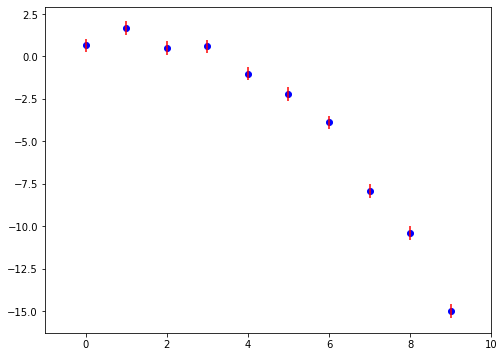

In [3]:
# Generate artificial data = quadratic function with a0 = .5, a1=1, a2 = -0.3
# plus some noise.
a0 = 0.5
a1 = 1
a2 = -0.3
sig = 0.4
Npoints = 10

xdata = np.arange(0,Npoints,1.)
ydata = a0 + a1 * xdata + a2 * xdata **2 + sig * np.random.standard_normal(size=Npoints)
sigma = np.ones(Npoints)*sig

print("Your x data values are stored as xdata")
print("Your y data values are stored as ydata")
print("Your y data uncertainties are stored as sigma")

plt.figure(figsize=(8,6))
plt.scatter(xdata,ydata,color='b')
plt.errorbar(xdata,ydata, sigma, color='r',ls='none')
plt.xlim(-1,Npoints)
plt.show()

**Write your solution for this problem in the cell below**

a= 0.652+/-0.396
b= 0.792+/-0.205
c=-0.278+/-0.022
chi^2 = 11.09
chi^2/d.f.= 1.58


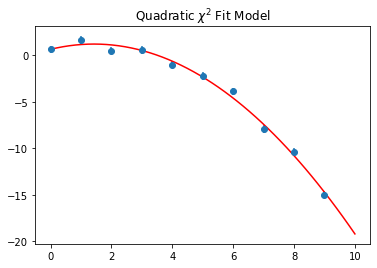

In [4]:
###Your Code Here###

"""This solution is from physics 77"""
#we have to define our model with our needed parameters
def model_quad(x, a, b, c):
    return a + b*x + c*x*x

par0    = np.array([-2.5, 1.5, 0.0]) # initial guess for parameters
par, cov = fitter.curve_fit(model_quad, xdata, ydata, par0, sigma) #fitter.curve_fit takes in the model, x,y data, guess, and sigma

# par arrays contains the values of parameters. cov is the covariance matrix
# decode it now
a = par[0]
ea = np.sqrt(cov[0,0])
print('a={0:6.3f}+/-{1:5.3f}'.format(a,ea))
b = par[1]
eb = np.sqrt(cov[1,1])
print('b={0:6.3f}+/-{1:5.3f}'.format(b,eb))
c = par[2]
ec = np.sqrt(cov[2,2])
print('c={0:6.3f}+/-{1:5.3f}'.format(c,ec))

# compute reduced chi2, although it is not needed for actually graphing the curve fit
chi_squared = np.sum(((model_quad(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))
#hard to tell there is actually error on the points but sigma is so small its really hard to notice it.
plt.title("Quadratic $\chi^2$ Fit Model")
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
xfit = np.linspace(0,10,50)
plt.plot(xfit,model_quad(xfit,par[0],par[1], par[2]),'r-')
plt.show()

# Root Finding

The following problem will be us exploring how to find the roots of a function numerically.

## Problem 4 (25 Points)

### [Adapted from Newman 6.15]

Consider a sixth-order polynomial 
$$P(x) = 924x^6 - 2772x^5 + 3150x^4 -1680x^3 +420x^2 -42x + 1$$
There is no general formula for the roots of a polynomial of degree 6, but you can compute the roots numerically. 
1. Make a plot of $P(x)$ from $x=0$ to $x=1$ and by inspecting it find rough values for the six roots of the polynomial. 
1. Write the code to solve for the positions of all six roots to at least ten decimal places using at least one of the methods dsicussed in class. (you can/should use the built-in functions). 

Hint: I would recommend using `fsolve` in the scipy library

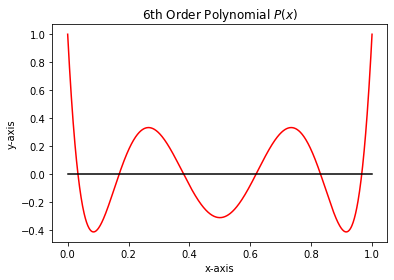

Roots are approximately: 0.05, 0.2, 0.4, 0.65, 0.85, 0.95. Just by examination
of the graph intersecting the y-axis when y = 0.

The values of the roots are: 0.0337652429, 0.1693953068,0.3806904070,
0.6193095930,0.8306046932, 0.9662347571


In [5]:
from scipy.optimize import fsolve
###Your Code Here###

def P(x):
    y = 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1
    return y


x = np.linspace(0,1,1000)
zer = np.zeros(1000)
plt.figure()
plt.title("6th Order Polynomial $P(x)$")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(x,P(x),"r-",label="P(x)")
plt.plot(x,zer,"k-",label="y=0")
plt.show()
print("""Roots are approximately: 0.05, 0.2, 0.4, 0.65, 0.85, 0.95. Just by examination
of the graph intersecting the y-axis when y = 0.""")
#part 2

roots = fsolve(P, [0.0,0.2,0.4,0.6,0.85,0.95])
print("""\nThe values of the roots are: {0:1.10f}, {1:1.10f},{2:1.10f},
{3:1.10f},{4:1.10f}, {5:1.10f}""".format(roots[0],roots[1],roots[2],roots[3],roots[4],roots[5]))